----

# European Gas Trade Flows (IEA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Show entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Read Data/Gas Trade Flows - March 2024 - GTF_data.csv into a pandas DataFrame
GTF_data = pd.read_csv('Data/Gas Trade Flows - March 2024 - GTF_data.csv')

# Ensure data in columns Oct-08 to Jan-24 are floats. These are columns 5 and out
GTF_data.iloc[:, 5:] = GTF_data.iloc[:, 5:].apply(pd.to_numeric, errors='coerce')

# Split into import and export data
GTF_data_import = GTF_data.groupby('Entry').sum().reset_index()
GTF_data_import = GTF_data_import.drop(columns=['Borderpoint', 'Exit', 'MAXFLOW (Mm3/h)']) 
GTF_data_export = GTF_data.groupby('Exit').sum().reset_index()
GTF_data_export = GTF_data_export.drop(columns=['Borderpoint', 'Entry', 'MAXFLOW (Mm3/h)'])

# Create a new column 'Total' which is the sum of all the columns from Oct-08 to Jan-24, i.e., columns 2 and out
GTF_data_import['Total'] = GTF_data_import.iloc[:, 2:].sum(axis=1)
GTF_data_export['Total'] = GTF_data_export.iloc[:, 2:].sum(axis=1)

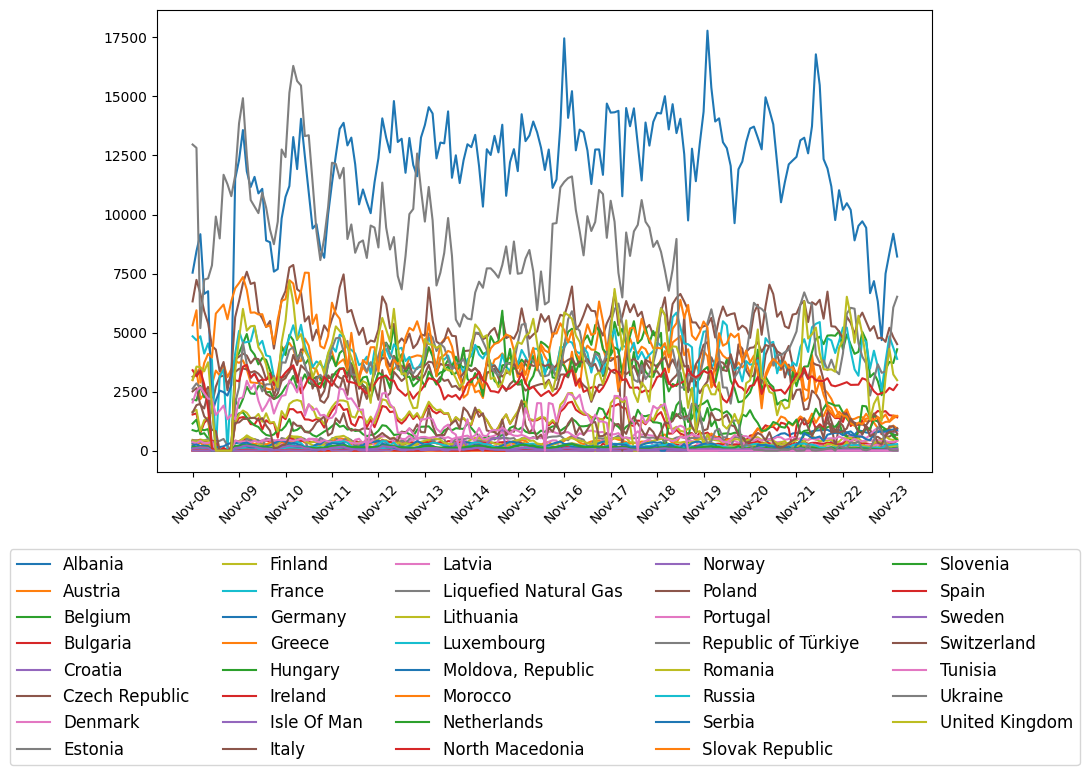

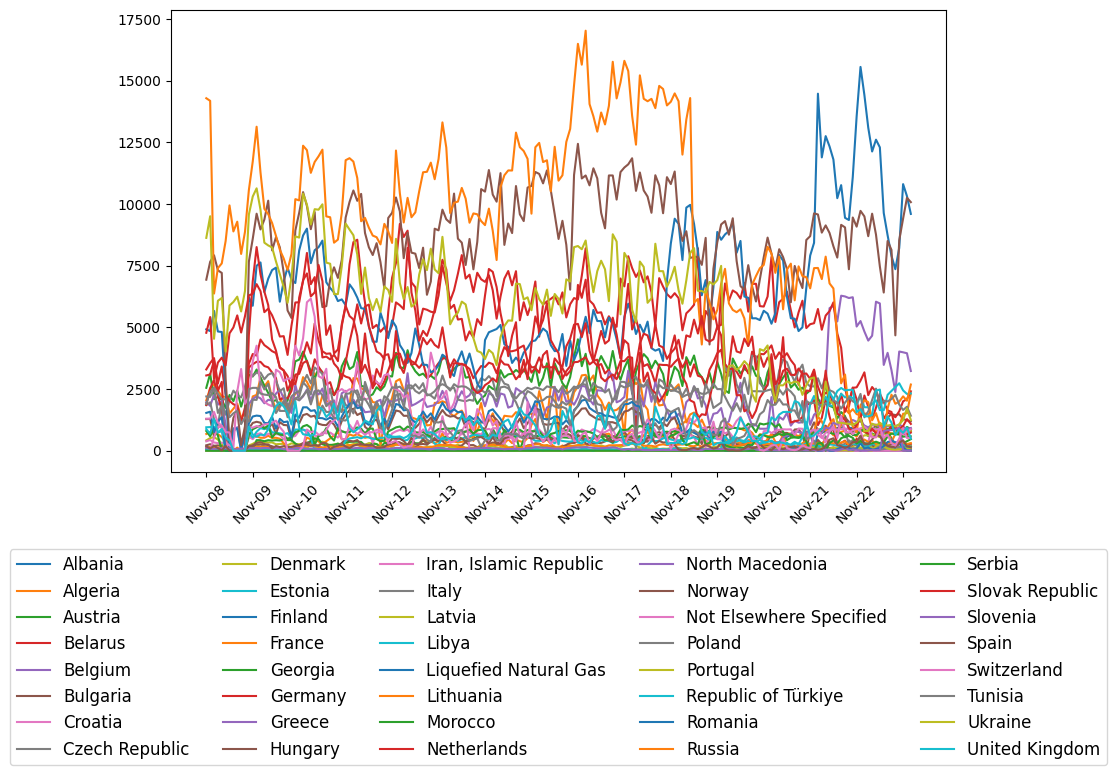

In [ ]:
plt.figure(figsize=(10, 6))
for country in GTF_data_import.index:
    plt.plot(GTF_data_import.columns[2:-1], GTF_data_import.iloc[country, 2:-1], label=GTF_data_import.iloc[country, 0])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
plt.xticks(GTF_data_import.columns[2:-1][::12], rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
for country in GTF_data_export.index:
    plt.plot(GTF_data_export.columns[2:-1], GTF_data_export.iloc[country, 2:-1], label=GTF_data_export.iloc[country, 0])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
plt.xticks(GTF_data_export.columns[2:-1][::12], rotation=45)
plt.show()

In [ ]:
GTF_data_import_top_10 = GTF_data_import.sort_values(by='Total', ascending=False).head(5)
GTF_data_import_top_10 = GTF_data_import_top_10.reset_index(drop=True)
GTF_data_export_top_10 = GTF_data_export.sort_values(by='Total', ascending=False).head(5)
GTF_data_export_top_10 = GTF_data_export_top_10.reset_index(drop=True)

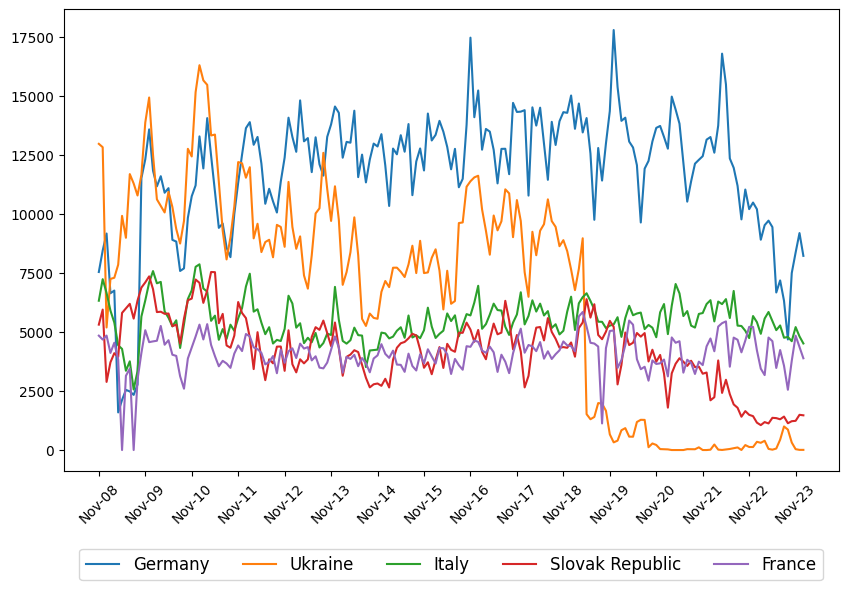

In [ ]:
plt.figure(figsize=(10, 6))
for country in GTF_data_import_top_10.index:
    plt.plot(GTF_data_import_top_10.columns[2:-1], GTF_data_import_top_10.iloc[country, 2:-1], label=GTF_data_import_top_10.iloc[country, 0])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
plt.xticks(GTF_data_import_top_10.columns[2:-1][::12], rotation=45)
plt.savefig('latex_figures/Gas_Exports_Top_5.png', bbox_inches='tight')

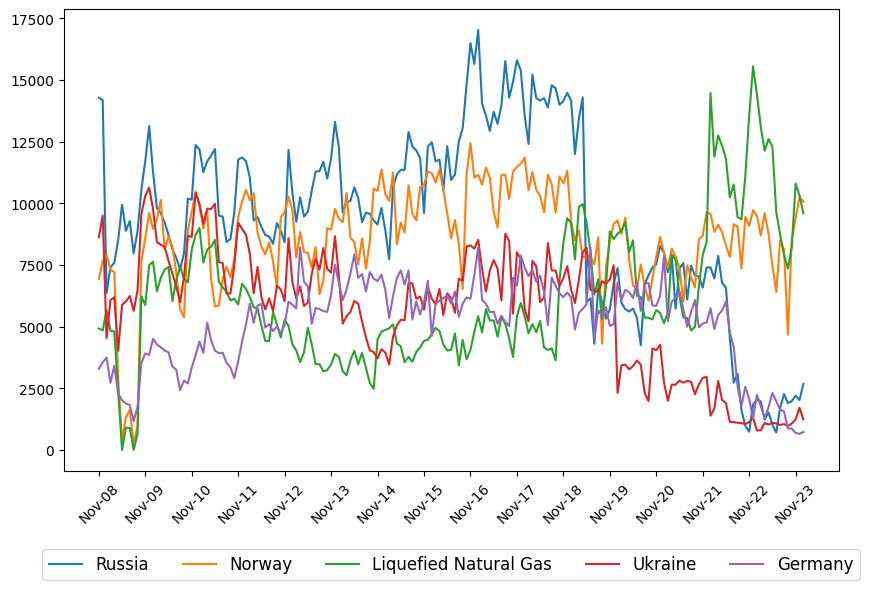

In [ ]:
plt.figure(figsize=(10, 6))
for country in GTF_data_export_top_10.index:
    plt.plot(GTF_data_export_top_10.columns[2:-1], GTF_data_export_top_10.iloc[country, 2:-1], label=GTF_data_export_top_10.iloc[country, 0])
plt.xticks(GTF_data_export_top_10.columns[2:-1][::12], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)
# Save the legend as well
plt.savefig('latex_figures/Gas_Imports_Top_5.png', bbox_inches='tight')

### European Import Split (Bruegel)

In [ ]:
# Read GEM-data/quarterly_graph_2024 Q1.xlsx into a pandas DataFrame
bruegel_data = pd.read_excel('Data/quarterly_graph_2024 Q1.xlsx')

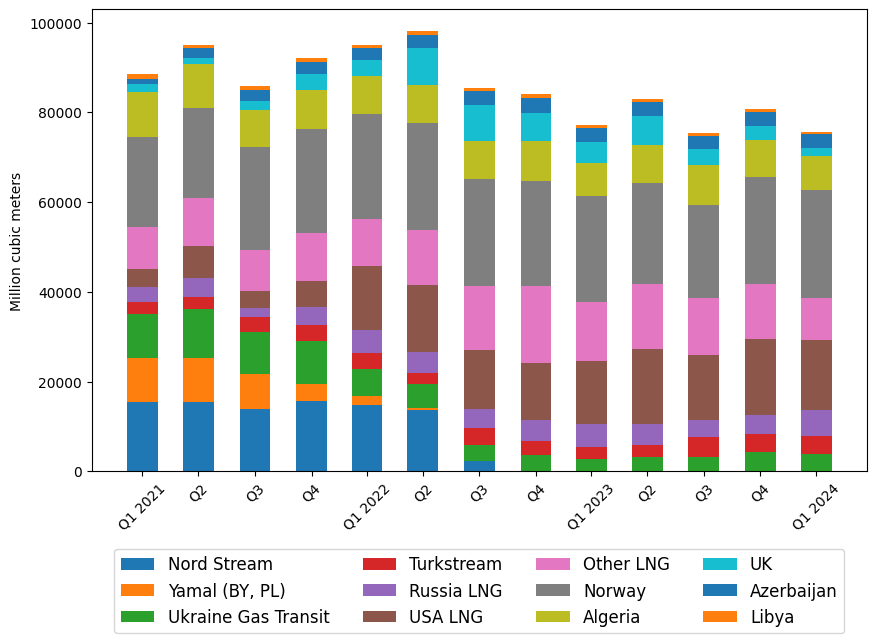

In [ ]:
# Plot the bruegel_data. The dates column are quarters, and the rest of the columns are gas exports to the EU
# Plot it as a stacked bar chart, using the column names as labels
plt.figure(figsize=(10, 6))
for i in range(1, len(bruegel_data.columns)):
    plt.bar(bruegel_data['dates'], bruegel_data.iloc[:, i], label=bruegel_data.columns[i], bottom=bruegel_data.iloc[:, 1:i].sum(axis=1), width=50)
plt.xticks(bruegel_data['dates'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=12)
plt.xticks(bruegel_data['dates'], ['Q1 2021', 'Q2', 'Q3', 'Q4', 'Q1 2022', 'Q2', 'Q3', 'Q4', 'Q1 2023', 'Q2', 'Q3', 'Q4', 'Q1 2024'])
plt.ylabel('Million cubic meters')
plt.savefig('latex_figures/Gas_Exports_to_EU.png', bbox_inches='tight')


In [ ]:
# Group Nord Stream, Yamal (BY, PL), Ukraine Gas Transit, Turkstream together and calculate its share of total gas exports
bruegel_data['Russia'] = bruegel_data['Nord Stream'] + bruegel_data['Yamal (BY, PL)'] + bruegel_data['Ukraine Gas Transit'] + bruegel_data['Turkstream']
bruegel_data['Russia Share'] = bruegel_data['Russia'] / bruegel_data.iloc[:, 1:].sum(axis=1)
bruegel_data['Other Share'] = 1 - bruegel_data['Russia Share']
bruegel_data

,dates,Nord Stream,"Yamal (BY, PL)",Ukraine Gas Transit,Turkstream,Russia LNG,USA LNG,Other LNG,Norway,Algeria,UK,Azerbaijan,Libya,Russia,Russia Share,Other Share
0,2021-03-31,15358.767633,9800.212527,9800.280924,2842.923903,3313.297135,4046.636956,9300.056200,20016.236610,10073.115669,1640.847652,1326.611411,914.029684,37802.184987,0.299458,0.700542
1,2021-06-30,15404.674290,9781.775321,10904.784728,2800.350375,4185.431649,7033.273347,10853.634810,19927.103754,9847.151268,1402.433750,2079.985046,772.946864,38891.584714,0.290485,0.709515
2,2021-09-30,13814.394331,7927.087842,9407.804200,3257.031165,1922.080024,3931.964138,8971.878168,23004.089289,8230.817689,1978.071210,2594.189696,827.956261,34406.317537,0.286067,0.713933
3,2021-12-31,15685.689929,3716.347772,9609.176896,3679.606779,3876.769107,5945.372823,10541.285255,23266.633750,8716.940050,3428.207872,2783.979061,801.294797,32690.821376,0.262067,0.737933
4,2022-03-31,14676.298610,2024.019694,6213.326652,3524.772532,5116.737828,14133.949131,10552.002362,23354.623895,8569.391952,3484.789383,2743.560731,512.836852,26438.417487,0.217879,0.782121
5,2022-06-30,13564.978276,649.777925,5339.892162,2434.798312,4668.580849,14897.026108,12234.781392,23893.976070,8361.206227,8164.030149,3107.038894,708.949297,21989.446675,0.183223,0.816777
6,2022-09-30,2264.982423,0.000000,3535.431775,3842.804850,4199.586221,13175.581999,14339.647314,23676.756738,8525.155166,8162.558954,3098.151523,593.110975,9643.219049,0.101447,0.898553
7,2022-12-31,0.000000,0.000000,3694.221499,3147.891807,4566.856133,12624.027920,17305.222743,23426.364254,8730.887417,6400.859889,3307.228577,873.443851,6842.113306,0.075255,0.924745
8,2023-03-31,0.000000,0.000000,2837.380096,2637.472494,5036.417725,14101.048245,13170.213642,23518.528435,7318.676874,4850.594403,3068.134926,691.298139,5474.852590,0.066198,0.933802
9,2023-06-30,0.000000,0.000000,3267.948682,2588.875575,4601.492368,16794.255840,14550.795481,22424.073815,8509.097454,6484.323957,3037.083973,722.073983,5856.824257,0.065928,0.934072


### European production vs. consumption

In [ ]:
# Read Data/table into a pandas DataFrame
europe_split = pd.read_csv('Data/table')
europe_split = europe_split.transpose()
europe_split.columns = europe_split.iloc[0]
europe_split = europe_split.drop(europe_split.index[0])
europe_split = europe_split.reset_index()
europe_split = europe_split.rename(columns={'index': 'dates'})
europe_split['dates'] = pd.to_datetime(europe_split['dates'])
europe_split = europe_split.set_index('dates')

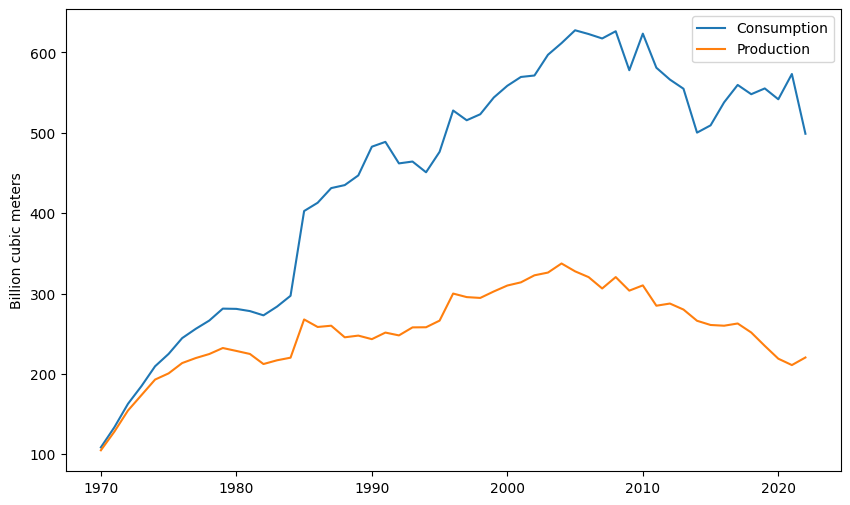

In [ ]:
# Plot the europe_split. The first column is the date, the second is consumption and third is production
plt.figure(figsize=(10, 6))
plt.plot(europe_split.index, europe_split['Consumption'], label='Consumption')
plt.plot(europe_split.index, europe_split['Production'], label='Production')
plt.ylabel('Billion cubic meters')
plt.legend()
plt.savefig('latex_figures/europe_consumption_production.png', bbox_inches='tight')
plt.show()

### Final Consumption of Gas

#### By sector

In [ ]:
# Read data/International Energy Agency - final consumption of gas by sector in Europe.csv into a pandas DataFrame
iea_data = pd.read_csv('Data/International Energy Agency - final consumption of gas by sector in Europe.csv')
iea_data = iea_data.pivot(columns='Year', values='Value', index='final consumption of gas by sector in Europe')
iea_data.index.name = 'Sector'
iea_data = iea_data.apply(pd.to_numeric, errors='coerce')
iea_data.to_csv('Data/iea_data.csv')

In [ ]:
# Read Data/iea_data.csv into a pandas DataFrame
iea_data = pd.read_csv('Data/iea_data.csv', index_col='Sector')
iea_data = iea_data.apply(pd.to_numeric, errors='coerce')
iea_data = iea_data / 1000000

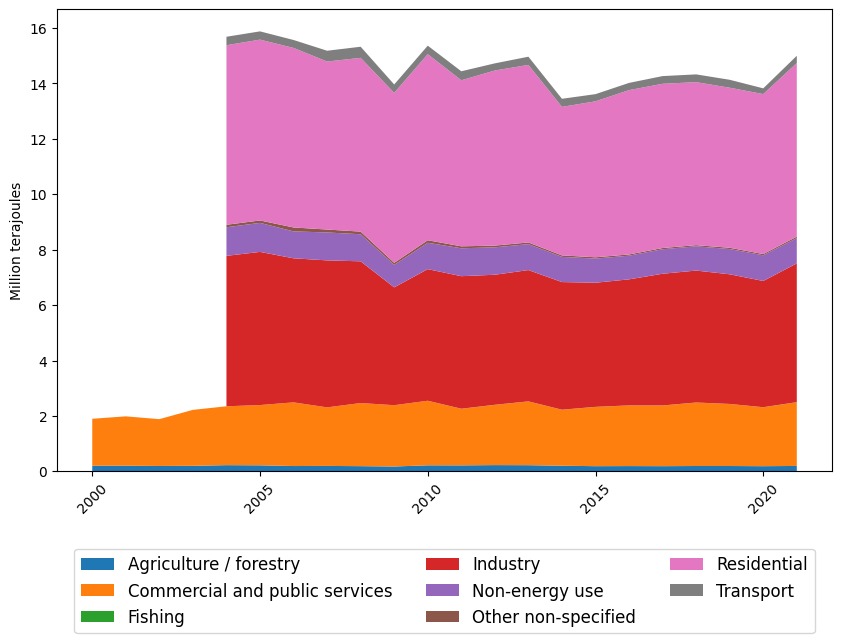

In [ ]:
# Plot the iea_data using plt.stackplot. Let the x-axis be the years, and the y-axis be the values
plt.figure(figsize=(10, 6))
plt.stackplot(iea_data.columns, iea_data.values)
plt.legend(iea_data.index, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=12)
plt.xticks(iea_data.columns[::5], rotation=45)
plt.ylabel('Million terajoules')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('latex_figures/EU_final_gas_consumption.png', bbox_inches='tight')
plt.show()

In [ ]:
# Create a new dataframe called iea_data_perc which is the percentage of each sector in each year
iea_data_perc = iea_data.div(iea_data.sum(axis=0), axis=1) * 100
iea_data_perc

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Sector,,,,,,,,,,,,,,,,,,,,,,
Agriculture / forestry,1.400155,1.361453,1.322842,1.309806,1.431690,1.376164,1.234583,1.292649,1.228207,1.257982,1.424169,1.499929,1.537454,1.491942,1.513432,1.376839,1.362058,1.316248,1.350924,1.367246,1.353556,1.304196
Commercial and public services,11.627349,11.899329,11.477189,13.224836,13.543085,13.696615,14.761899,13.924407,14.863806,15.846094,15.163988,14.148643,14.766926,15.380446,15.028360,15.710322,15.607498,15.346188,15.981964,15.840025,15.381295,15.323588
Fishing,NaN,NaN,NaN,NaN,0.000102,0.000132,0.000161,0.000138,0.000463,0.000652,0.001315,0.010099,0.015249,0.009631,0.011001,0.017074,0.013363,0.013293,0.013683,0.012117,0.016621,0.025501
Industry,37.723309,37.013785,37.446544,36.345874,34.617573,34.804300,33.391020,34.943147,33.373479,30.453769,30.914626,33.126016,31.870705,31.663202,34.254716,32.905063,32.448317,33.320645,33.237456,33.109216,32.959848,33.387411
Non-energy use,5.474733,5.140371,4.832858,4.840807,6.574316,6.599696,6.242633,6.640450,6.373498,5.804171,6.195974,6.975457,6.722991,6.250843,6.765628,6.394042,6.096862,6.194585,6.109396,6.443543,6.708734,6.093777
Other non-specified,2.128447,2.098857,1.883832,0.569223,0.576269,0.544142,0.911130,0.692772,0.620846,0.535511,0.592340,0.483386,0.421146,0.407949,0.391089,0.347668,0.312753,0.314847,0.291827,0.331551,0.320450,0.348672
Residential,40.368107,40.965508,41.546927,41.919216,41.311169,41.101207,41.620896,39.942440,40.923584,43.929457,43.712060,41.510881,42.911707,42.817497,39.862407,41.346044,42.305966,41.545685,41.062342,40.871730,41.760416,41.775324
Transport,1.277900,1.520697,1.489809,1.790238,1.945797,1.877745,1.837679,2.563996,2.616116,2.172365,1.995527,2.245588,1.753821,1.978489,2.173367,1.902948,1.853183,1.948508,1.952408,2.024573,1.499081,1.741533


#### By country

In [ ]:
by_country = pd.read_excel('Data/nrg_cb_gas_page_spreadsheet.xlsx', sheet_name='Sheet 1')
by_country.columns = ['Country', 'Consumption']
by_country = by_country.set_index('Country')
by_country = by_country.apply(pd.to_numeric, errors='coerce')
by_country.sort_values(by='Consumption', ascending=False, inplace=True)
by_country.head()


,Consumption
Country,
Germany,3155098.147
Italy,2618555.417
Türkiye,1952331.980
France,1570871.963
Spain,1318784.347


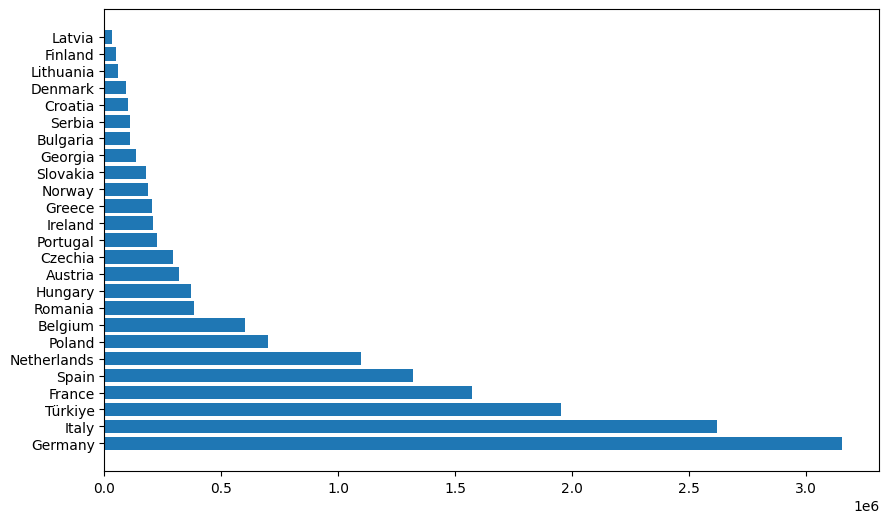

In [ ]:
# As a horizontal bar chart, plot the top 25 countries by gas consumption, from most to least
plt.figure(figsize=(10, 6))
plt.barh(by_country.index[:25], by_country['Consumption'][:25])
plt.show()

In [ ]:
# Read data/eu_natural_gas_dependency.csv into a pandas DataFrame
eu_dependency = pd.read_csv('Data/eu_natural_gas_dependency.csv')

# Join the by_country and eu_dependency DataFrames on the 'Country' column
by_country = by_country.join(eu_dependency.set_index('Country'))
by_country

# Remove entries with 0 or NaN in either the 'Consumption' or 'Dependency' columns
by_country = by_country.dropna()
by_country = by_country[(by_country['Consumption'] != 0) & (by_country['Dependency'] != 0)]

# Convert the dependency from a string "93,30%" to a float 93.30
by_country['Dependency'] = by_country['Dependency'].str.rstrip('%').str.replace(',', '.').astype(float)

# Divide the 'Consumption' column by 1000000 to convert from terajoules to million terajoules
by_country['Consumption'] = by_country['Consumption'] / 1000000

by_country

,Consumption,Dependency
Country,,
Germany,3.155098,93.30
Italy,2.618555,95.78
Türkiye,1.952332,98.60
France,1.570872,97.44
Spain,1.318784,98.61
Netherlands,1.099017,65.64
Belgium,0.600471,100.69
Romania,0.384569,4.65
Hungary,0.369067,96.61


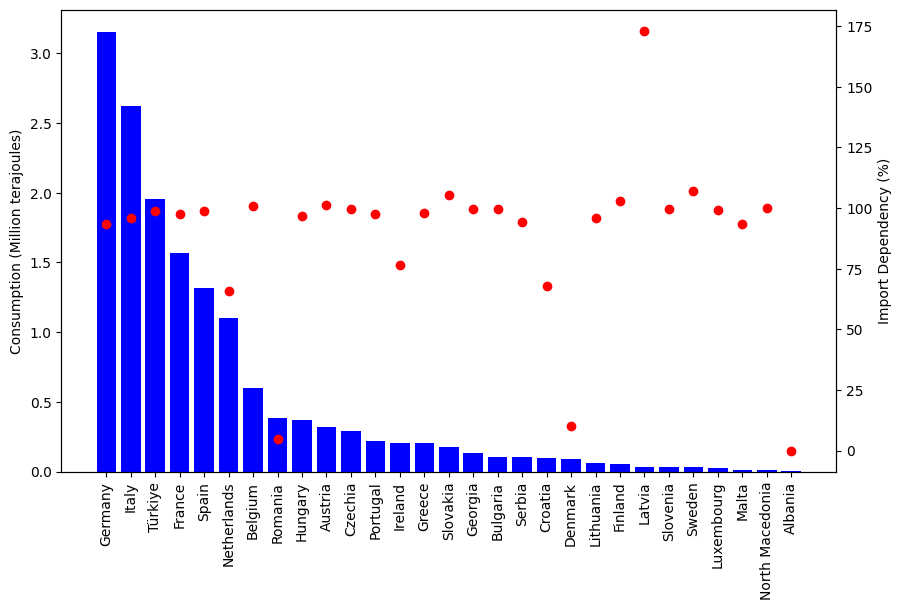

In [ ]:
# Plot the Consumption and Dependency columns of by_country in a twin-axis plot.
# I.e., for each entry, plot the Consumption on the left y-axis as a bar, and the Dependency on the right y-axis as a point
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks( rotation=90)
ax2 = ax1.twinx()
ax1.bar(by_country.index, by_country['Consumption'], color='b')
ax2.plot(by_country.index, by_country['Dependency'], 'ro')
ax1.set_ylabel('Consumption (Million terajoules)')
ax2.set_ylabel('Import Dependency (%)')
ax1.ticklabel_format(style='plain', axis='y')
plt.savefig('latex_figures/Consumption_vs_Dependency.png', bbox_inches='tight')
plt.show()

In [ ]:
# Create by_country_perc which is the percentage of each country's consumption in the total consumption
by_country_perc = by_country['Consumption'] / by_country['Consumption'].sum() * 100
by_country_perc

Country
Germany            20.624865
Italy              17.117487
Türkiye            12.762387
France             10.268784
Spain               8.620889
Netherlands         7.184271
Belgium             3.925275
Romania             2.513927
Hungary             2.412590
Austria             2.098401
Czechia             1.928817
Portugal            1.459905
Ireland             1.357027
Greece              1.339159
Slovakia            1.153107
Georgia             0.877480
Bulgaria            0.707126
Serbia              0.704083
Croatia             0.648604
Denmark             0.601873
Lithuania           0.389683
Finland             0.336642
Latvia              0.210414
Slovenia            0.207864
Sweden              0.205593
Luxembourg          0.161095
Malta               0.098161
North Macedonia     0.072893
Albania             0.011598
Name: Consumption, dtype: float64

----

# Data density

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely import wkt
import networkx as nx
import dill
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import ast
import utils_pre_processing as upp
from utils_pre_processing import split_col_to_and_from
# Show all columns when using .head()
pd.set_option('display.max_columns', None)

In [ ]:
iggielgn_borderpoints = pd.read_csv('IGGIELGN/IGGIELGN_BorderPoints.csv', delimiter=';')
iggielgn_compressors = pd.read_csv('IGGIELGN/IGGIELGN_Compressors.csv', delimiter=';')
iggielgn_consumers = pd.read_csv('IGGIELGN/IGGIELGN_Consumers.csv', delimiter=';')
iggielgn_lngs = pd.read_csv('IGGIELGN/IGGIELGN_LNGs.csv', delimiter=';')
iggielgn_nodes = pd.read_csv('IGGIELGN/IGGIELGN_Nodes.csv', delimiter=';')
iggielgn_pipesegments = pd.read_csv('IGGIELGN/IGGIELGN_PipeSegments.csv', delimiter=';')
iggielgn_productions = pd.read_csv('IGGIELGN/IGGIELGN_Productions.csv', delimiter=';')
iggielgn_storages = pd.read_csv('IGGIELGN/IGGIELGN_Storages.csv', delimiter=';')

In [ ]:
# Print the number of entries in each table
print('BorderPoints:', len(iggielgn_borderpoints))
print('Compressors:', len(iggielgn_compressors))
print('Consumers:', len(iggielgn_consumers))
print('LNGs:', len(iggielgn_lngs))
print('Nodes:', len(iggielgn_nodes))
print('PipeSegments:', len(iggielgn_pipesegments))
print('Productions:', len(iggielgn_productions))
print('Storages:', len(iggielgn_storages))

In [ ]:
iggielgn_borderpoints = upp.split_column_to_multiple(iggielgn_borderpoints, 'method', 'method_')
iggielgn_compressors = upp.split_column_to_multiple(iggielgn_compressors, 'method', 'method_')
iggielgn_consumers = upp.split_column_to_multiple(iggielgn_consumers, 'method', 'method_')
iggielgn_lngs = upp.split_column_to_multiple(iggielgn_lngs, 'method', 'method_')
iggielgn_nodes = upp.split_column_to_multiple(iggielgn_nodes, 'method', 'method_')
iggielgn_pipesegments = upp.split_column_to_multiple(iggielgn_pipesegments, 'method', 'method_')
iggielgn_productions = upp.split_column_to_multiple(iggielgn_productions, 'method', 'method_')
iggielgn_storages = upp.split_column_to_multiple(iggielgn_storages, 'method', 'method_')

In [ ]:
def data_density(df, component_name, plot_graphs=False):

    # Get the columns starting with method_
    method_cols = [col for col in df.columns if col.startswith('method_')]

    # For each column, count the number of rows where the value is 'raw', and the number of rows where the value is not 'raw'
    method_counts = {}
    for col in method_cols:
        # Count the number of rows where the value is 'raw'
        raw_count = df[df[col] == 'raw'][col].count()
        # Count the number of rows where the value is not 'raw', as the number of rows minus the number of 'raw' rows. If the value is None, it is not 'raw'
        non_raw_count = df[col].count() - raw_count
        # Add None values to the non_raw_count if there are any
        if df[col].isnull().sum() > 0:
            non_raw_count += df[col].isnull().sum()
        # Store the counts in a dataframe
        method_counts[col] = {'raw': raw_count, 'non_raw': non_raw_count}
        method_counts_df = pd.DataFrame(method_counts).T

    if plot_graphs:
        method_counts_df.plot(kind='bar', stacked=True)
        plt.legend(['Raw', 'Non-raw'], loc='upper left')
        plt.title(f'Data density for {component_name}')

    return method_counts_df

In [ ]:
# Create a 1x2 grid of subplots, PipeSegments and Consumer data density
iggielgn_pipesegments_density = data_density(iggielgn_pipesegments, 'PipeSegments')
iggielgn_productions_density = data_density(iggielgn_productions, 'Consumer')

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
iggielgn_pipesegments_density.plot(kind='bar', stacked=True, ax=axs[0])
iggielgn_productions_density.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Consumer', fontsize=15)
axs[0].set_title('PipeSegments', fontsize=15)
axs[0].legend(['Raw', 'Non-raw'], loc='upper left')
# Hide the second legend
axs[1].legend().set_visible(False)
plt.setp(axs[0].get_yticklabels(), fontsize=15)
plt.setp(axs[1].get_yticklabels(), fontsize=15)
plt.setp(axs[0].get_legend().get_texts(), fontsize=15)

# Save the figure, but make sure the labels are not cut off
plt.tight_layout()
plt.savefig('latex_figures/data_density.png')


plt.show()

In [ ]:
# Calculate the percentage of raw data for each component, in total, across all columns
iggielgn_pipesegments_raw_percentage = iggielgn_pipesegments_density['raw'].sum() / (iggielgn_pipesegments_density['raw'].sum() + iggielgn_pipesegments_density['non_raw'].sum()) * 100
iggielgn_productions_raw_percentage = iggielgn_productions_density['raw'].sum() / (iggielgn_productions_density['raw'].sum() + iggielgn_productions_density['non_raw'].sum()) * 100
# iggielgn_consumers_raw_percentage = iggielgn_consumers_density['raw'].sum() / (iggielgn_consumers_density['raw'].sum() + iggielgn_consumers_density['non_raw'].sum()) * 100
# iggielgn_storages_raw_percentage = iggielgn_storages_density['raw'].sum() / (iggielgn_storages_density['raw'].sum() + iggielgn_storages_density['non_raw'].sum()) * 100

print(f'PipeSegments raw data percentage: {iggielgn_pipesegments_raw_percentage:.2f}%')
print(f'Productions raw data percentage: {iggielgn_productions_raw_percentage:.2f}%')
# print(f'Consumers raw data percentage: {iggielgn_consumers_raw_percentage:.2f}%')
# print(f'Storages raw data percentage: {iggielgn_storages_raw_percentage:.2f}%')

In [ ]:
# For each component, create a new dataframe containing the count of values in the method_ columns

# Filter in the method_ columns
iggielgn_pipesegments_methods = iggielgn_pipesegments.filter(like='method_')

# Fill the None values with "None"
iggielgn_pipesegments_methods = iggielgn_pipesegments_methods.fillna('None')

# Create a new dataframe containing the count of values in the method_ columns
iggielgn_pipesegments_methods_counts = iggielgn_pipesegments_methods.apply(lambda x: x.value_counts()).T

# Combine the counts of all columns starting with Lasso( into a single column, and drop the original columns
iggielgn_pipesegments_methods_counts['Lasso'] = iggielgn_pipesegments_methods_counts.filter(like='Lasso(').sum(axis=1)
iggielgn_pipesegments_methods_counts.drop(iggielgn_pipesegments_methods_counts.filter(like='Lasso(').columns, axis=1, inplace=True)

# Combine the counts of all columns starting with Median( into a single column, and drop the original columns
iggielgn_pipesegments_methods_counts['Median'] = iggielgn_pipesegments_methods_counts.filter(like='Median(').sum(axis=1)
iggielgn_pipesegments_methods_counts.drop(iggielgn_pipesegments_methods_counts.filter(like='Median(').columns, axis=1, inplace=True)

# Count makeAttrib(laglong_mean) as raw
# iggielgn_pipesegments_methods_counts['raw'] = iggielgn_pipesegments_methods_counts['raw'] + iggielgn_pipesegments_methods_counts['make_Attrib(latlong_mean)']

# Plot the count of values in the method_ columns for PipeSegments as a stacked bar chart
iggielgn_pipesegments_methods_counts.plot(kind='bar', stacked=True)
plt.title('PipeSegments method counts')
# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
# On a map of Europe, plot the nodes with country_code = XX
# Filter the nodes where country_code = XX
iggielgn_nodes_xx = iggielgn_nodes[iggielgn_nodes['country_code'] == 'XX']

fig, ax = plt.subplots(figsize=(16, 16))

# Use BaseMap to underlay a map of Europe
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=70, llcrnrlon=-15, urcrnrlon=80, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the nodes on the map
for row in iggielgn_nodes_xx.itertuples():
    x, y = m(row.long, row.lat)
    m.plot(x, y, 'bo', markersize=5)

# Save the plot, without whitespace above and below the plot
plt.savefig('latex_figures/iggielgn_nodes_xx.png', bbox_inches='tight')

plt.show()

----

# Country codes

In [ ]:
import pandas as pd
import config
access_token = config.LOCATIONIQ_ACCESS_TOKEN

In [ ]:
nodes = pd.read_csv('IGGIELGN/IGGIELGN_Nodes.csv', delimiter=';')
nodes.head()

In [ ]:
# output a valut count for the country_code column
nodes['country_code'].value_counts()

In [ ]:
import requests

url = "https://us1.locationiq.com/v1/reverse"

headers = {"accept": "application/json"}

params = {
    "key": access_token,
    "lat": 51.5074,
    "lon": 0.1278,
    "format": "json"
}

# Write a function that takes a lat long and returns the country code
def get_country_code(lat, lon):
    params = {
        "key": access_token,
        "lat": lat,
        "lon": lon,
        "format": "json"
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    # Capitalize the country code
    country_code = data['address']['country_code'].upper()

In [ ]:
# For the rows where country_code == "XX", use the lat and long columns to fill in the missing country code
for node in nodes[nodes['country_code'] == 'XX'].iterrows():
    lat = node[1]['lat']
    long = node[1]['long']
    try:
        country_code = get_country_code(lat, long)
        print(f"Success. Setting country code for {lat}, {long} to {country_code}")
    except:
        print(f"Error getting country code for {lat}, {long}"
              f"Setting country code to 'XX'")
        country_code = 'XX'
    nodes.loc[node[0], 'country_code'] = country_code
    

In [ ]:
# output a valut count for the country_code column
nodes['country_code'].value_counts()

----

# Examine specific components

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata


from matplotlib.patches import Patch
import pickle
import pandas as pd
import networkx as nx

pd.set_option('display.max_rows', None)

In [ ]:
with open('graph_objects/G_multi_directed_iggielgn.pickle', 'rb') as f:
    G_multi_directed = pickle.load(f)
    G_multi_directed.name = 'G_multi_directed'

### Plot specific nodes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The flow type of node SEQ_369__L_LMGN is {'id': 'SEQ_369__L_LMGN', 'name': 'SEQ_369__L_LMGN', 'source_id': "['RU_4486']", 'node_id': "['SEQ_369__L_LMGN']", 'lat': 53.69563, 'long': 39.26323, 'country_code': 'RU', 'comment': nan, 'tags': '{}', 'nuts_id_1': 'RU', 'nuts_id_2': 'RU', 'nuts_id_3': 'RU', 'uncertainty_nuts_id_1': 0, 'uncertainty_nuts_id_2': 0, 'uncertainty_nuts_id_3': 0, 'method_nuts_id_1': 'M_Consumers.add_Nuts_Num()', 'method_nuts_id_2': 'M_Consumers.add_Nuts_Num()', 'method_nuts_id_3': 'M_Consumers.add_Nuts_Num()', 'type': 'node', 'flow_type': 'transit'}
The flow type of node N_193_M_LMGN is {'id': 'N_193_M_LMGN', 'name': 'N_193_M_LMGN', 'source_id': "['LT_2484']", 'node_id': "['N_193_M_LMGN']", 'lat': 55.02199, 'long': 25.0735, 'country_code': 'LT', 'comment': nan, 'tags': '{}', 'nuts_id_1': 'LT0', 'nuts_id_2': 'LT01', 'nuts_id_3': 'LT011', 'uncertainty_nuts_id_1': 0, 'uncertainty_nuts_id_2': 0, 'uncertainty_nuts_id_3': 0, 'method_nuts_id_1': 'M_Consumers.add_Nuts_Num()',

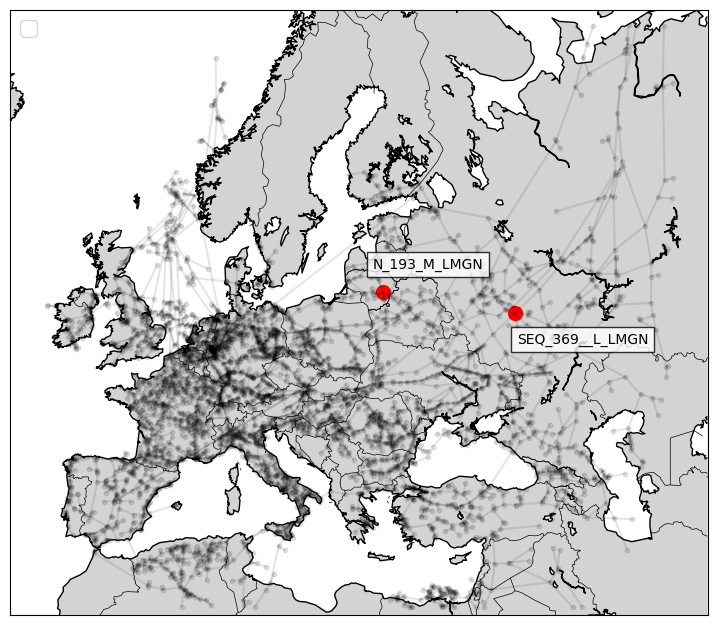

In [ ]:
lats = [G_multi_directed.nodes[node]['lat'] for node in G_multi_directed.nodes()]
lons = [G_multi_directed.nodes[node]['long'] for node in G_multi_directed.nodes()]


plt.figure(figsize=(9, 10)) 

# Plot the map

m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=69, llcrnrlon=-15, urcrnrlon=60, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

# Plot the points themselves
x, y = m(lons, lats)
m.scatter(x, y, c='black', marker='o', s=10, alpha=0.1) 


# Plot the all the edges in G_multi_directed
for u, v in G_multi_directed.edges():
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, 'k-', alpha=0.1)

plt.legend(loc='upper left', fontsize=15)  

# PLOT NODE
node = 'SEQ_369__L_LMGN'
x, y = m(G_multi_directed.nodes[node]['long'], G_multi_directed.nodes[node]['lat'])
m.scatter(x, y, c='red', marker='o', s=100)
plt.text(x+1600000, y-400000, node, fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.8))
print(f'The flow type of node {node} is {G_multi_directed.nodes[node]}')

# PLOT NODE
node = 'N_193_M_LMGN'
x, y = m(G_multi_directed.nodes[node]['long'], G_multi_directed.nodes[node]['lat'])
m.scatter(x, y, c='red', marker='o', s=100)
plt.text(x + 1200000, y+250000, node, fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor='white', alpha=0.8))
print(f'The flow type of node {node} is {G_multi_directed.nodes[node]}')


plt.show()


### Plot specific edges

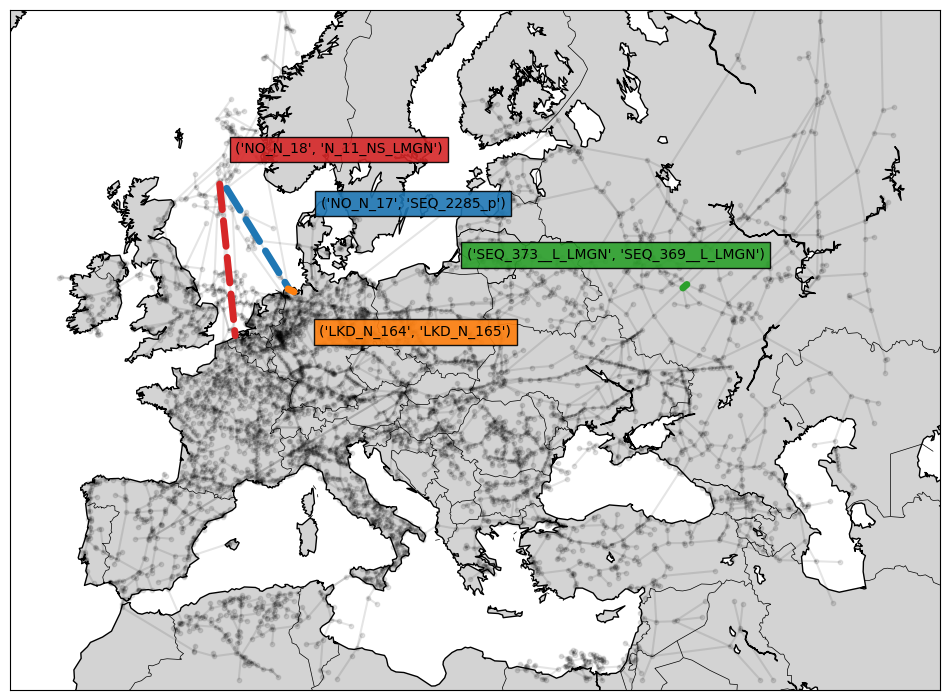

In [ ]:
import matplotlib.colors as mcolors

common_edges = [('N_539_M_LMGN','SEQ_7053__M_LMGN'),
('SEQ_8285__L_LMGN','SEQ_2025__L_LMGN'), ('SEQ_369__L_LMGN', 'SEQ_373__L_LMGN'),
('SEQ_10361__M_LMGN','N_183_L_LMGN')]

common_edges = [('NO_N_17', 'SEQ_2285_p'), ('LKD_N_164',
'LKD_N_165'), ('SEQ_373__L_LMGN', 'SEQ_369__L_LMGN'), ('NO_N_18', 'N_11_NS_LMGN')]

plt.figure(figsize=(12, 10)) 

# Plot the map
m = Basemap(projection='merc', llcrnrlat=30, urcrnrlat=65, llcrnrlon=-15, urcrnrlon=60, resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray')

lats = [G_multi_directed.nodes[node]['lat'] for node in G_multi_directed.nodes()]
lons = [G_multi_directed.nodes[node]['long'] for node in G_multi_directed.nodes()]

# Plot the points themselves
x, y = m(lons, lats)
m.scatter(x, y, c='black', marker='o', s=10, alpha=0.1) 

# Plot all the edges in G_multi_directed
for u, v in G_multi_directed.edges():
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, 'k-', alpha=0.1)

# Generate a list of unique colors
colors = list(mcolors.TABLEAU_COLORS.values())

# Plot the common edges with unique colors
for i, edge in enumerate(common_edges):
    u, v = edge
    color = colors[i % len(colors)]  # Cycle through the colors list
    x, y = m([G_multi_directed.nodes[u]['long'], G_multi_directed.nodes[v]['long']], [G_multi_directed.nodes[u]['lat'], G_multi_directed.nodes[v]['lat']])
    m.plot(x, y, color=color, linewidth=5,  zorder=10, linestyle='dashed', dash_capstyle='round', dash_joinstyle='round')

    # Prevent overlapping text
    if edge == ('SEQ_10361__M_LMGN', 'N_183_L_LMGN'):
        plt.text(x[0]+2000000, y[0]+400000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))
    elif edge == ('NO_N_18', 'N_11_NS_LMGN'):
        plt.text(x[0]+2000000, y[0]+250000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))

    elif edge == ('NO_N_17', 'SEQ_2285_p'):
        plt.text(x[0]+2500000, y[0]-200000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))
    elif edge == ('SEQ_373__L_LMGN', 'SEQ_369__L_LMGN'):
        plt.text(x[0]+700000, y[0]+200000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))


    else:
        plt.text(x[0]+2000000, y[0]-450000, str(edge), fontsize=10, ha='right', va='bottom', color='black', bbox=dict(facecolor=color, alpha=0.9))


plt.savefig('latex_figures/selected_edges.svg')
plt.show()